<a href="https://colab.research.google.com/github/KP-Akshay04/Reggression/blob/master/Car.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving cars.csv to cars.csv


In [ ]:
import numpy as np # linear algebra

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt

%matplotlib inline

import seaborn as sns

sns.set() # Setting a default seaborn setting in plots

from sklearn.model_selection import train_test_split, RandomizedSearchCV

from sklearn.linear_model import LinearRegression,Ridge,Lasso

from sklearn.ensemble import RandomForestRegressor

from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import r2_score,mean_squared_error

# Input data files are available in the read-only "../input/" directory

#For example, running this (by clicking run or pressing Shift+Enter) will

import os
for dirname,_,filenames in os.walk('/kaggle/input'):
  for filename in filenames:
    print(os.path.join(dirname, filename))

In [ ]:
df=pd.read_csv('cars.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
df.shape


(49, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       49 non-null     object 
 1   Year           49 non-null     int64  
 2   Selling_Price  49 non-null     float64
 3   Present_Price  49 non-null     float64
 4   Kms_Driven     49 non-null     int64  
 5   Fuel_Type      49 non-null     object 
 6   Seller_Type    49 non-null     object 
 7   Transmission   49 non-null     object 
 8   Owner          49 non-null     int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 3.6+ KB


In [ ]:
df.isnull().mean()

,0
Car_Name,0.0
Year,0.0
Selling_Price,0.0
Present_Price,0.0
Kms_Driven,0.0
Fuel_Type,0.0
Seller_Type,0.0
Transmission,0.0
Owner,0.0


In [ ]:
df.describe(include='all')

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
count,49,49.000000,49.000000,49.000000,49.000000,49,49,49,49.0
unique,15,NaN,NaN,NaN,NaN,3,2,2,NaN
top,ciaz,NaN,NaN,NaN,NaN,Petrol,Dealer,Manual,NaN
freq,8,NaN,NaN,NaN,NaN,31,47,45,NaN
mean,NaN,2013.326531,4.591837,7.055918,38898.000000,NaN,NaN,NaN,0.0
std,NaN,3.293856,2.255441,2.495964,22440.518906,NaN,NaN,NaN,0.0
min,NaN,2003.000000,0.350000,2.280000,2071.000000,NaN,NaN,NaN,0.0
25%,NaN,2012.000000,2.850000,4.890000,24524.000000,NaN,NaN,NaN,0.0
50%,NaN,2014.000000,4.600000,7.490000,43000.000000,NaN,NaN,NaN,0.0
75%,NaN,2015.000000,6.500000,8.890000,50000.000000,NaN,NaN,NaN,0.0


In [ ]:
df.describe(include='object')

,Car_Name,Fuel_Type,Seller_Type,Transmission
count,49,49,49,49
unique,15,3,2,2
top,ciaz,Petrol,Dealer,Manual
freq,8,31,47,45


In [ ]:
print(df['Fuel_Type'].unique())
print(df['Selling_Price'].unique())
print(df['Transmission'].unique())
print(df['Owner'].unique())

['Petrol' 'Diesel' 'CNG']
[3.35 4.75 7.25 2.85 4.6  9.25 6.75 6.5  8.75 7.45 6.85 7.5  6.1  2.25
 7.75 3.25 2.65 4.9  4.4  2.5  2.9  3.   4.15 6.   1.95 3.1  2.35 4.95
 5.5  2.95 4.65 0.35 5.85 2.55 1.25 1.05 5.8 ]
['Manual' 'Automatic']
[0]


In [ ]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

/tmp/ipython-input-1475824536.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Year)


<Axes: xlabel='Year', ylabel='Density'>

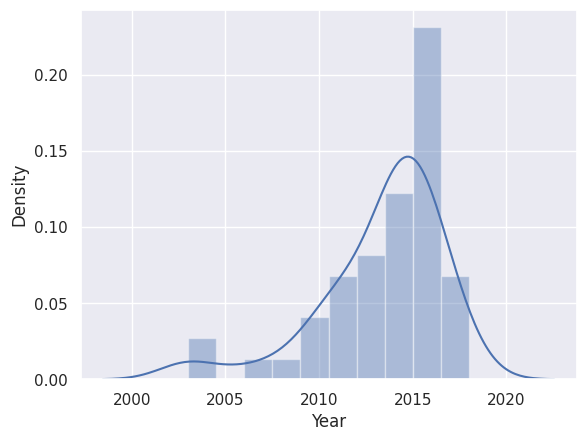

In [ ]:
sns.distplot(df.Year)

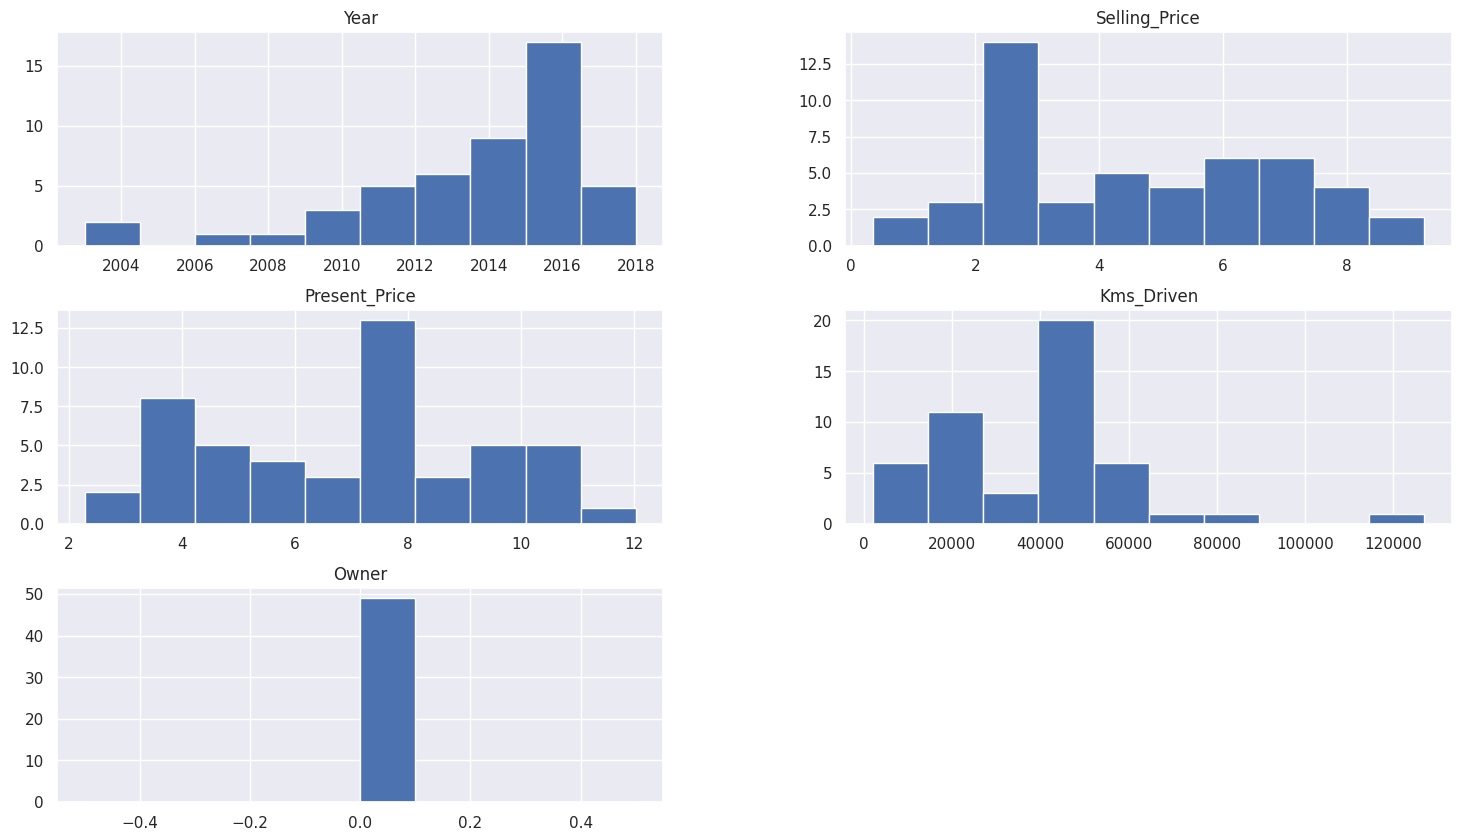

In [ ]:
fig = df.hist(figsize=(18,10))

<Axes: xlabel='Seller_Type', ylabel='Selling_Price'>

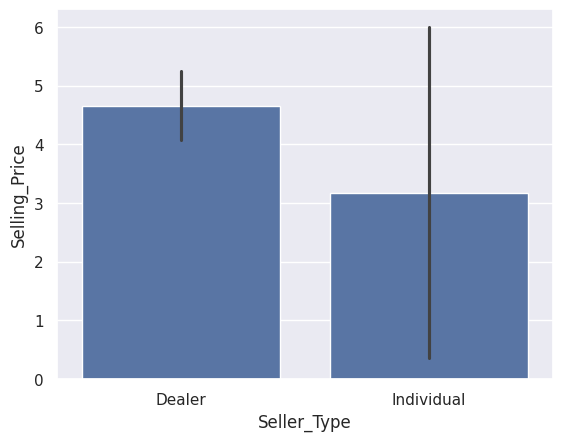

In [ ]:
sns.barplot(x='Seller_Type', y='Selling_Price',data=df)

<Axes: xlabel='Fuel_Type', ylabel='Selling_Price'>

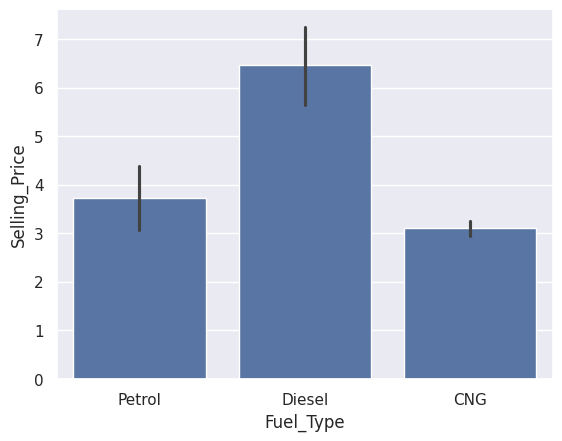

In [ ]:
sns.barplot(x='Fuel_Type', y='Selling_Price',data=df)

<Axes: xlabel='Selling_Price', ylabel='Year'>

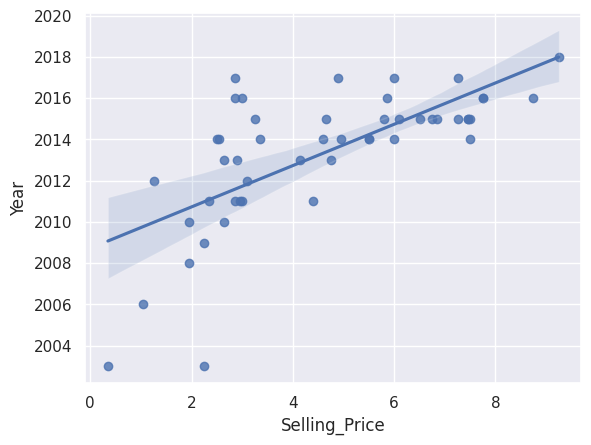

In [ ]:
sns.regplot(x='Selling_Price', y='Year',data=df)

<Axes: xlabel='Kms_Driven', ylabel='Selling_Price'>

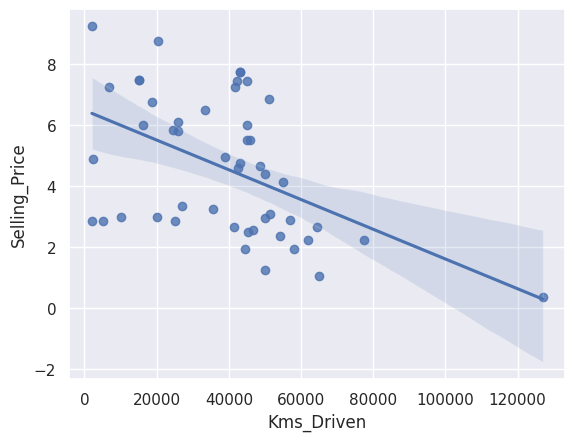

In [ ]:
sns.regplot(x='Kms_Driven', y='Selling_Price',data=df)

<Axes: xlabel='Kms_Driven', ylabel='Selling_Price'>

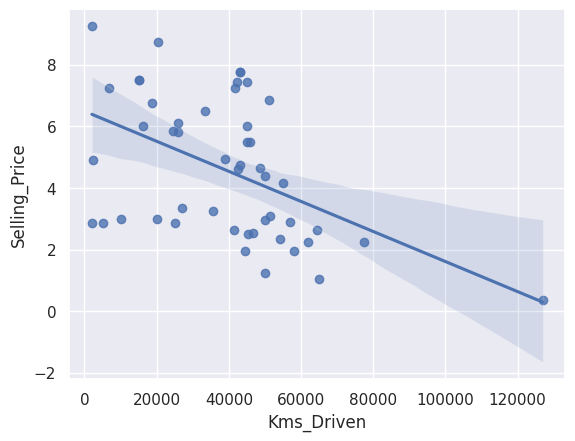

In [ ]:
sns.regplot(x='Kms_Driven', y='Selling_Price',data=df)

<Axes: xlabel='Transmission', ylabel='Selling_Price'>

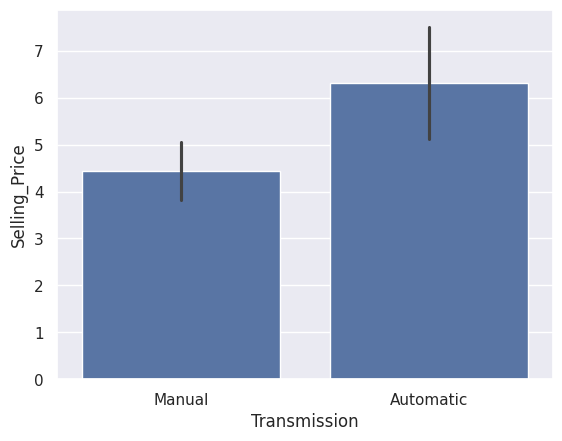

In [ ]:
sns.barplot(x='Transmission', y='Selling_Price',data=df)

<Axes: xlabel='Owner', ylabel='Selling_Price'>

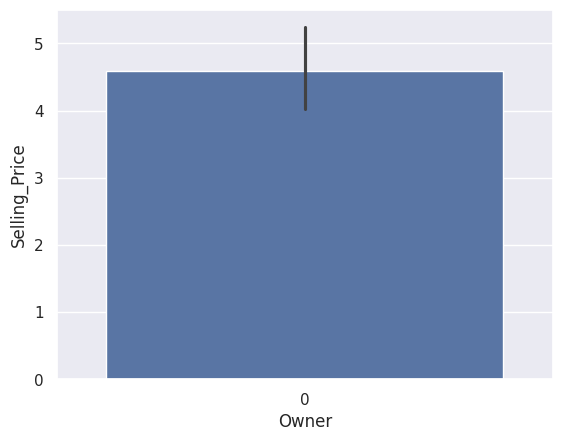

In [ ]:
sns.barplot(x='Owner', y='Selling_Price',data=df)

In [ ]:
def plot_categorical (feature, dataset):
    ax = sns.countplot(y=feature, data=dataset)
    plt.title('Distribution of' + feature)
    plt.xlabel('Count')

    total = len(dataset[feature])
    for p in ax.patches:

          percentage ='{:.1f}%'.format(100* p.get_width()/total)
          x=p.get_x() + p.get_width() + 0.02
          y=p.get_y() + p.get_height()/2
          ax.annotate(percentage, (x, y))
    plt.show()

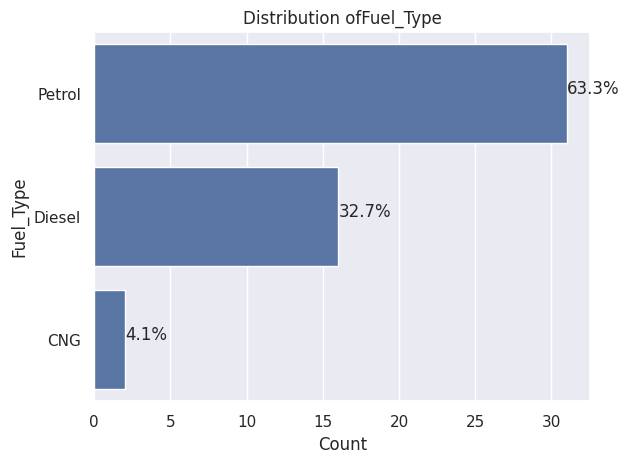

In [ ]:
plot_categorical('Fuel_Type',df)

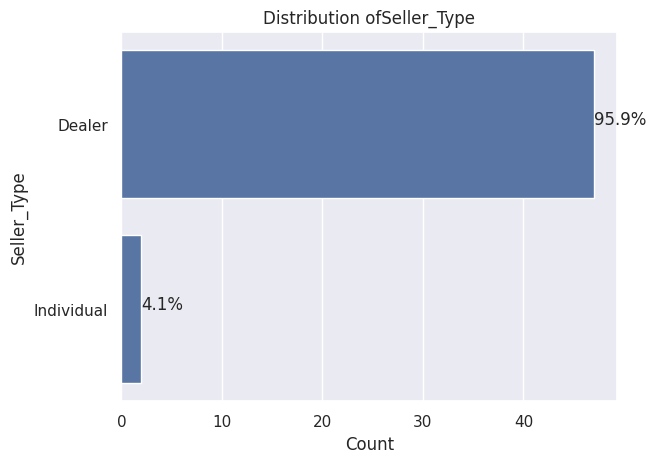

In [ ]:
plot_categorical('Seller_Type',df)

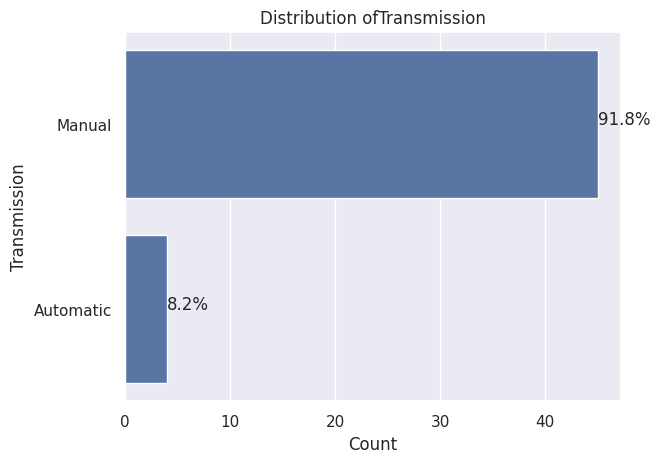

In [ ]:
plot_categorical('Transmission',df)